<a href="https://colab.research.google.com/github/akhilesh0090/Human-Activity-Recognition-using-Smartphone-Data/blob/main/i_mage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Manipulation

---


## Content

- Opening an image
- Details of an image
- Visualise RGB channels
- Rotate an image
- Reverse an image
- Crop/Trim an image
- Save an image
- Blurr an image
- Image Contrast

Make sure the required libraries are imported.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Now, we'll see how we can play with images using Numpy.

---

### Opening an Image

- Well, to play with an image, we first need to open it.

\
#### But, How can we open an image in our code?

- To open an image, we will use the `matplotlib` library to read and show images.

- We will cover all the functionalities of `matplotlib` in detail in visualization lecture.

- For this use case, just know that it uses an image module for working with images.

- It offers two useful methods **`imread()` and `imshow()`**.
  - **`imread()` – to read the images**
  - **`imshow()` – to display the images**

\
#### Now, let's go ahead and load our images.

In [ ]:
# fruit image
!gdown https://i.pinimg.com/originals/3f/cd/17/3fcd1785622d5eea86a236d9ad795fba.jpg


Downloading...
From: https://i.pinimg.com/originals/3f/cd/17/3fcd1785622d5eea86a236d9ad795fba.jpg
To: /content/3fcd1785622d5eea86a236d9ad795fba.jpg
100% 56.5k/56.5k [00:00<00:00, 64.7MB/s]


In [ ]:
# emma stone image
!gdown 1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI

Downloading...
From: https://drive.google.com/uc?id=1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI
To: /content/emma_stone.jpeg
100% 80.3k/80.3k [00:00<00:00, 3.46MB/s]


In [ ]:
# dog image
!gdown 1ViZ9V5y5s9IRazM5ZaoWd_7p8QpJIJ92

Downloading...
From: https://drive.google.com/uc?id=1ViZ9V5y5s9IRazM5ZaoWd_7p8QpJIJ92
To: /content/dog.jpeg
100% 58.7k/58.7k [00:00<00:00, 58.6MB/s]


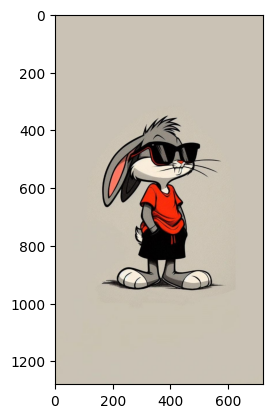

In [ ]:
img = np.array(plt.imread('/content/3fcd1785622d5eea86a236d9ad795fba.jpg'))
plt.imshow(img)

---

### Details of an Image

#### What do you think are the dimensions and shape of this image?

We can see the **dimension and shape of this image**, using the **`Image.ndim`** and **`Image.shape`** properties.

In [ ]:
print('# of dims: ',img.ndim) # dimension of an image
print('img shape: ',img.shape) # shape of an image

# of dims:  3
img shape:  (1280, 720, 3)


#### How come our 2D image has 3 dimensions?

- **Coloured images have a 3rd dimension for depth or RGB colour channel**.
- Here, the **depth is 3**
- But we will come to what RGB colour channels are in a bit.

#### First, let's understand something peculiar happening here with the `shape` of image.

\
#### Do you see something different happening here when we check the `shape` of image?

- When we discussed **3D Arrays**, we saw that **depth was the first element of the `shape` tuple**.

- But when we are loading an image using **matplotlib and getting its 3D array**, we see that **depth is the last element of the `shape` tuple**.

\
#### Why is there a difference b/w normal np array and the np array generated from Matplotlib in terms of where the depth part of `shape` appears?

- This is how `matplotlib` reads the image.
- It **reads the depth values (R, G and B values) of each pixel one by one** and stacks them one after the other

\
#### The shape of imge we read is: (1333, 2000, 3)

- `matplotlib` **first reads that each plane has** $1333\times2000$ **pixels**.

- Then, it **reads depth values (R, G and B values) of each pixel and place the values in 3 separate planes**.

- That is why **depth is the last element of `shape` tuple in np array generated from an image read by `matplotlib`**.

- Whereas in a **normal np array, depth is the first element of `shape` tuple**.

---

### RGB Channels

#### What are these RGB channels?
#### How can we visualize them?

We can split the image into each RGB color channels using only Numpy.

\
#### But, What exactly RGB values are?

- These are values of each pixel of an image.

- Each pixel is made up of **3 components/channels** - **Red, Green, Blue** - which form RGB values.

- Coloured images are usually stored as 3-dimensional arrays of **8-bit unsigned integers**.

- So, the range of values that each channel of a pixel can take is $0$ to $2^8 - 1$.

- That is, each pixel's each channel, R, G and B can range from **0 to 255**.

\
#### Each pixel has these 3 values which combined together forms the colour that the pixel represents.

- So, a pixel **[255, 0, 0 ]** will be **RED** in colour.

- A pixel **[0, 255, 0]** will be **GREEN** in colour.

- A pixel **[0, 0, 255]** will be **BLUE** in colour.

\
#### Question: What will be the colour of pixel [0, 0, 0]?

- Black

#### Question: What will be the colour of pixel [255, 255, 255]?

- White

\
#### Now, let's separate the R, G, B channels in our image:

- We'll make use of **slicing of arrays**.
- For **RED** channel, we'll **set values of GREEN and BLUE to 0**.

In [ ]:
img_R = img.copy()

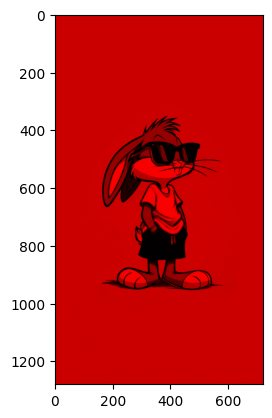

In [ ]:
img_R[:, :, (1, 2)] = 0
plt.imshow(img_R)

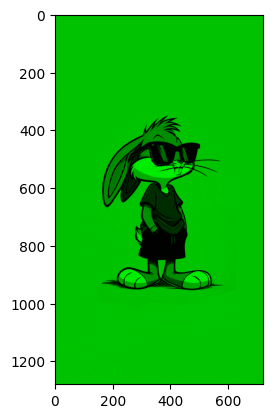

In [ ]:
img_R[:, :, (1, 2)] = 0
plt.imshow(img_R)

Similarly, for GREEN channel, we'll set values of RED and BLUE to 0.

... and same for BLUE channel.

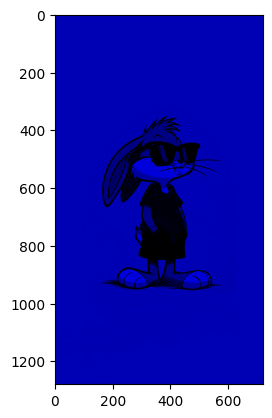

In [ ]:
img_R[:, :, (0, 1)] = 0
plt.imshow(img_R)

---

### Rotating an Image

#### What if we want to rotate the image?

- Remember **image is a Numpy array**.
- **Rotating the image means transposing the array**.

#### For this, we'll use the `np.transpose()` function in numpy.

\
#### Now, let's understand `np.transpose()` function first

- It takes 2 arguments.
  - **1st argument** is obviously the **array that we want to transpose (image array in our case)**.
  - **2nd argument is `axes`**
- Its a **tuple or list of ints**.
- It contains a **permutation of [0,1,..,N-1] where N is the number of axes of array**.

\
#### Now, our image array has 3 axes (3 dimensions) ---> 0th, 1st and 2nd

- We specify how we want to transpose the array by giving an **order of these axes inside the tuple**.

    - **Vertical axis (Row axis) is 0th axis**
    - **Horizontal axis (Column axis) is 1st axis**
    - **Depth axis is 2nd axis**

- **In order to rotate the image, we want to transpose the array**.

- That is, we want to **transpose rows into columns and columns into rows**.

- So, we want to **interchange the order of row and column axis** ---> **interchange order of 0th and 1st axis**.

- We **don't want to change the depth axis (2nd axis)** ---> So, it will **remain at its original order position**.

Now, the **order of axes in orginal image is `(0, 1, 2)`**.

\
#### What will be the order of axes rotated image or transposed array?

- The **order of axes in rotated image will be `(1, 0, 2)`**.

- **Order (Position) of 0th and 1st column is interchanged**.

\
#### Let's first see the original image.

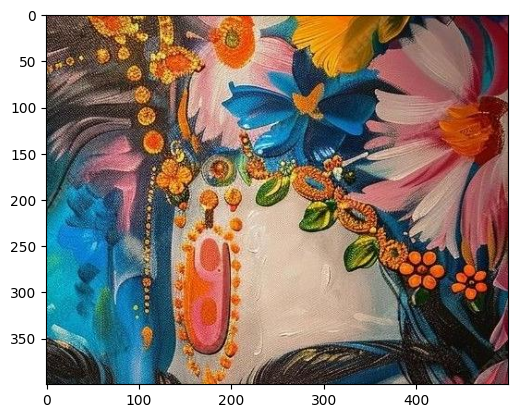

In [ ]:
img = np.array(plt.imread('/content/b93019b7cb3d90a66b62d05afed353cd.jpg'))
plt.imshow(img)

#### Now, let's see it in action:

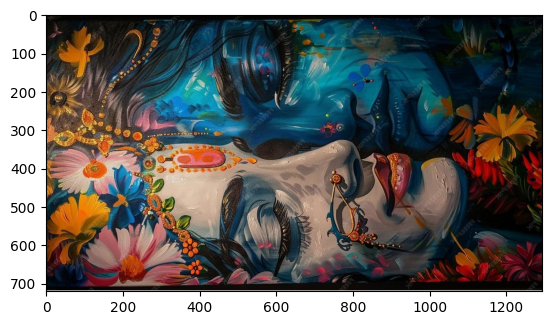

In [ ]:
img_rotated = np.transpose(img,(1,0,2))
plt.imshow(img_rotated)

#### As you can see:

- We obtained the **rotated image by transposing the np array**.

---

### Reverse an image, vertically.

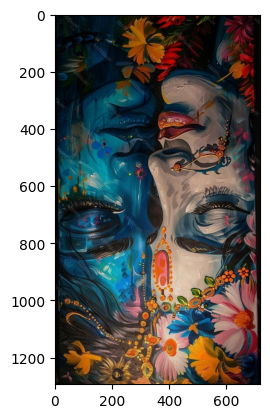

In [ ]:
rev_img = img[::-1,:,:]
plt.imshow(rev_img)

### Reverse an image, horizontally.

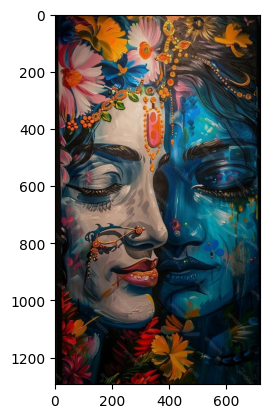

In [ ]:
rev_img = img[:,::-1,:]
plt.imshow(rev_img)

---

### Crop/Trim Image

#### Now, how can we crop an image using Numpy?

- Remember! Image is a numpy array of pixels.
- So, We can trim/crop an image in Numpy using Array using **Slicing**.



#### Let's crop the image to get the face only.

- If you see x and y axis, the face starts somewhat from ~200 and ends at ~700 on x-axis.
    - **x-axis in image is column axis in np array**
    - Columns change along x-axis

- And it lies between ~100 to ~500 on y-axis.
    - **y-axis in image is row axis in np array**
    - Rows change along y-axis

\
#### We'll use this information to slice our image array.

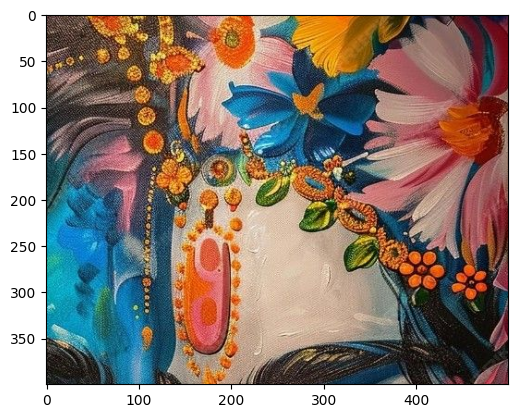

In [ ]:
img_crop = img[100:500, 200:700, :]
plt.imshow(img_crop)

---

### Saving Image as `ndarray`

#### How can we save `ndarray` as image?

To save a `ndarray` as an image, we can use `matplotlib`'s `plt.imsave()` method.

- **1st agrument** ---> We provide the path and name of file we want to save the image as.

- **2nd agrument** ---> We provide the image we want to save.

\
#### Let's save the cropped face image we obtained previously.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `c` is your image array
t = np.array(t, dtype=np.uint8)  # Convert to uint8

path = '/content/b93019b7cb3d90a66b62d05afed353cd.jpg'
plt.imsave(path, t)


In [ ]:
path = '/content/b93019b7cb3d90a66b62d05afed353cd.jpg'
plt.imsave(path, t)

---

### Blurring an Image

array([[[117,  85,  86],
        [104,  72,  73],
        [145, 113, 114],
        ...,
        [ 30,  16,  52],
        [ 35,  21,  57],
        [ 38,  24,  60]],

       [[125,  93,  94],
        [ 65,  33,  34],
        [ 88,  56,  57],
        ...,
        [ 38,  22,  58],
        [ 43,  27,  63],
        [ 46,  30,  66]],

       [[103,  73,  73],
        [130, 100, 100],
        [ 83,  53,  53],
        ...,
        [ 45,  25,  60],
        [ 52,  32,  67],
        [ 56,  36,  71]],

       ...,

       [[ 34,  36,  31],
        [ 29,  31,  26],
        [ 10,  12,   7],
        ...,
        [112,  44,  55],
        [112,  44,  55],
        [120,  52,  63]],

       [[ 23,  28,  22],
        [ 20,  25,  19],
        [ 27,  32,  26],
        ...,
        [110,  42,  53],
        [116,  48,  59],
        [126,  58,  69]],

       [[ 48,  53,  47],
        [ 24,  29,  23],
        [ 71,  76,  70],
        ...,
        [107,  39,  50],
        [115,  47,  58],
        [126,  58,  69]]], dtype=uint8)
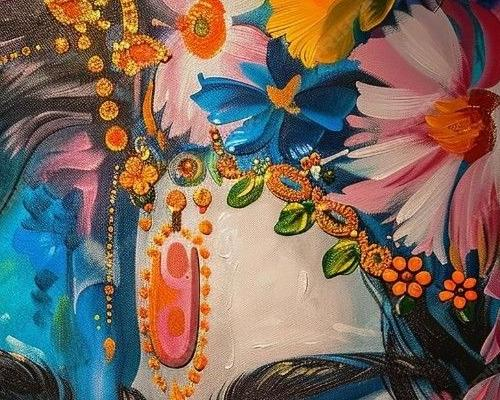

In [ ]:
img

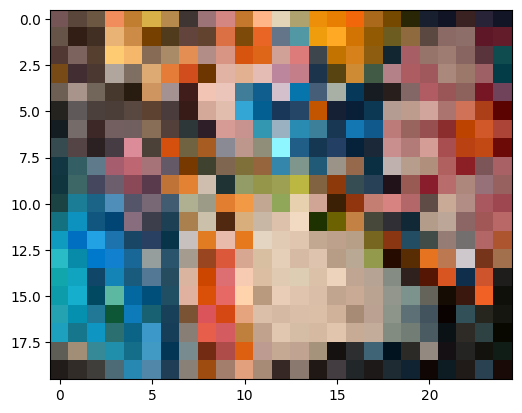

In [ ]:
t = img[::20,::20,:]
plt.imshow(t)

#### We are **removing the pixel** and it is making the image blur.

---

### Image Contrast

#### Creating an image with contrast -

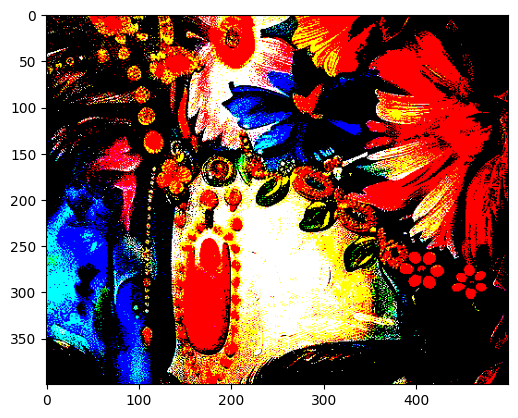

In [ ]:
c=np.where(img>150,255,0)
plt.imshow(c)

#### Creating an image with negative contrast -

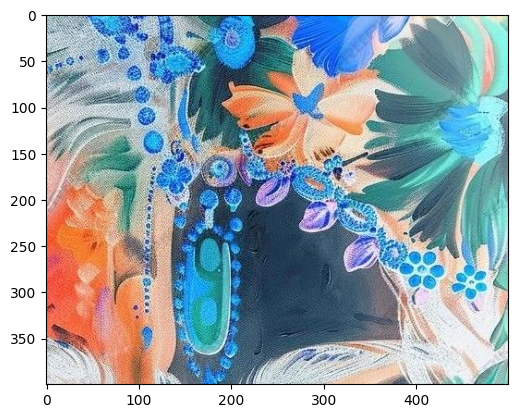

In [ ]:
dog_negative_sorry=255-img
plt.imshow(dog_negative_sorry)

---